<a href="https://colab.research.google.com/github/Josepholaidepetro/Volve_ML/blob/main/FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [3]:
!git clone https://gitlab.com/josepholaide10/petroleum-exploration-suite.git

fatal: destination path 'petroleum-exploration-suite' already exists and is not an empty directory.


In [11]:
import sys
import os
import lasio
import warnings

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_style('darkgrid')
sys.path.append('/content/petroleum-exploration-suite/Formation_evaluation/formation_evaluation.py')
warnings.filterwarnings("ignore")
%matplotlib inline

In [12]:
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/petroleum-exploration-suite/Formation_evaluation/formation_evaluation.py',
 '/content/petroleum-exploration-suite/Formation_evaluation/formation_evaluation.py']

# File Path

In [5]:
def get_file(path):
  files=os.listdir(path)
  train_files = sorted([os.path.join(path, f) for f in files if 'LAS' in f])
  return train_files

train_dir = '/content/petroleum-exploration-suite/data'
train_files = get_file(train_dir)

In [6]:
train_files

['/content/petroleum-exploration-suite/data/15_9-F-1A.LAS',
 '/content/petroleum-exploration-suite/data/15_9-F-1B.LAS']

In [7]:
def to_dataframe(files):
  df_well = []
  df_keys = []
  df_cuvs = []
  for file in files:
      df = lasio.read(file)
      df_keys.append(df.keys())
      df_cuvs.append(df.curves)
      well = df.df()
      well.reset_index(inplace=True)
      df_well.append(well)
  return df_well, df_keys, df_cuvs


df_well, df_keys, df_cuvs = to_dataframe(train_files) 

well1, well2 = df_well

# Dataframe keys and curves

In [8]:
for i in df_keys:
  print(i)

['DEPTH', 'ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI', 'DRHO', 'DT', 'DTS', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RHOB', 'ROP', 'RPCEHM', 'RPCELM', 'RT']
['DEPTH', 'ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI', 'DRHO', 'DT', 'DTS', 'GR', 'NBGRCFM', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD', 'RHOB', 'RM', 'ROP', 'RPCEHM', 'RPCELM', 'RT']


In [9]:
df_cuvs[0]

[CurveItem(mnemonic="DEPTH", unit="M", value="00 001 00 00", descr="0  Depth", original_mnemonic="DEPTH", data.shape=(35361,)),
 CurveItem(mnemonic="ABDCQF01", unit="g/cm3", value="00 000 00 00:   1  ABDCQF01:COMPOSITE:rC:0001", descr="v1", original_mnemonic="ABDCQF01", data.shape=(35361,)),
 CurveItem(mnemonic="ABDCQF02", unit="g/cm3", value="00 000 00 00:   2  ABDCQF02:COMPOSITE:rC:0001", descr="v1", original_mnemonic="ABDCQF02", data.shape=(35361,)),
 CurveItem(mnemonic="ABDCQF03", unit="g/cm3", value="00 000 00 00:   3  ABDCQF03:COMPOSITE:rC:0001", descr="v1", original_mnemonic="ABDCQF03", data.shape=(35361,)),
 CurveItem(mnemonic="ABDCQF04", unit="g/cm3", value="00 000 00 00:   4  ABDCQF04:COMPOSITE:rC:0001", descr="v1", original_mnemonic="ABDCQF04", data.shape=(35361,)),
 CurveItem(mnemonic="BS", unit="inches", value="00 000 00 00:   5  BS:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="BS", data.shape=(35361,)),
 CurveItem(mnemonic="CALI", unit="inches", value="70 280 00 01: 

# Importing Formation Evaluation Module

In [14]:
from formation_evaluation import formation_eval
formation_eval1 = formation_eval(datapath=None, mnemonics=None)

The module takes a particular amount of logs for evaluation, usually the important ones

In [15]:
df_well1 = []
for i in range(len(df_well)):
    df = formation_eval1.well_logs(dataframe=df_well[i])
    df_well1.append(df)
    
well1, well2 = df_well1

# Using the triple_combo_plot method

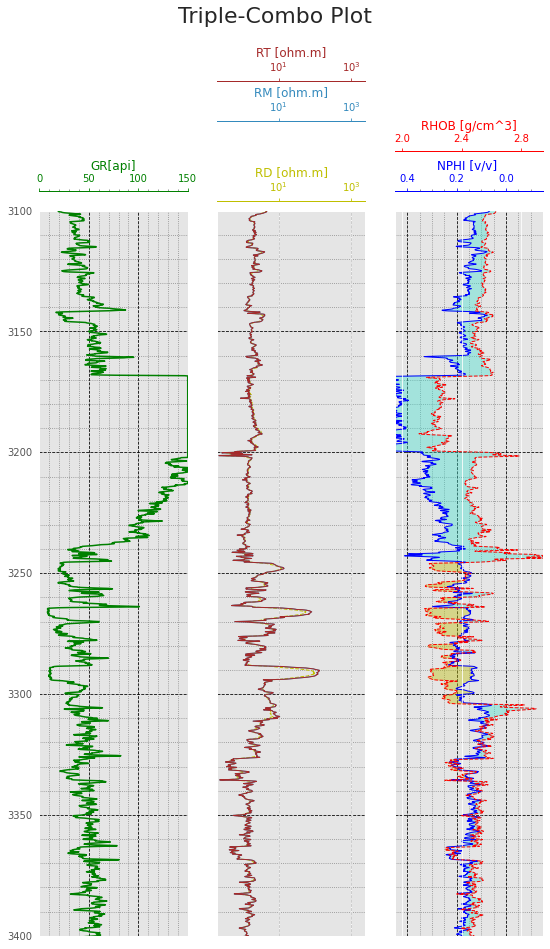

In [36]:
formation_eval1.triple_combo_plot(well2,3100, 3400, plotsize=(8,13))

plt.savefig('preddt')

In [35]:
formation_eval1.well_result(well2, top=3270, bottom=3280, rw=0.7)

'Water saturation, Density Porosity and Effective Porosity are as follow nan, nan, nan respectively '

# Using the density_porosity method

In [28]:
well2['PHID'] = formation_eval1.density_porosity(well2)

# Using the effective_porosity method

In [30]:
well2['PHIE'] = formation_eval1.effective_porosity(well2)

# Using the water_saturation method

In [34]:
well2['SW'] = formation_eval1.water_saturation(well2)